<a href="https://colab.research.google.com/github/palienko105/Projects/blob/main/Test_parcels_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание:**

https://docs.google.com/document/d/1IVDeUUmjDEqmYIRXQSrSwzP6G8Q4oDQnX74M3Pbkwl0/edit

# Создаем данные:

In [ ]:
import pandas as pd
import numpy as np
import sqlite3

In [ ]:
parcel_aggr = pd.DataFrame()
parcel_aggr['parcel_id'] = range(100)

In [ ]:
parcel_aggr['accept_date'] = (pd.Series
                              (pd.date_range('2017-04-01', '2017-04-30'))
                              .sample(100,replace=True).values)

In [ ]:
parcel_aggr['index_id'] = pd.Series(range(1,11)).sample(100, replace=True).values

In [ ]:
parcel_aggr['mass'] = pd.Series(abs(np.random.normal(12000, 5000, 100))).astype(int).values

In [ ]:
parcel_aggr['price'] = (pd.Series(abs(np.random.normal(300000, 200000, 100)))
                        .astype(int).values)

In [ ]:
parcel_aggr['client_type'] = (pd.Series(['Физическое лицо', 'Юридическое лицо'])
                              .sample(100,replace=True).values)

In [ ]:
parcel_aggr

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-13,9,4619,309642,Физическое лицо
1,1,2017-04-13,8,4488,396160,Юридическое лицо
2,2,2017-04-21,3,11865,148675,Физическое лицо
3,3,2017-04-22,2,9623,14271,Физическое лицо
4,4,2017-04-25,7,19054,68317,Физическое лицо
...,...,...,...,...,...,...
95,95,2017-04-13,2,18982,242519,Физическое лицо
96,96,2017-04-27,2,8586,403403,Юридическое лицо
97,97,2017-04-28,6,19529,212936,Физическое лицо
98,98,2017-04-27,5,4801,573355,Юридическое лицо


**parcel_aggr – агрегированная информацию об отправлениях (за апрель 2017 года)**

*   parcel_id - Уникальный идентификатор отправления
*   accept_date - Дата приема отправления
*   Index - Индекс отделения, где было принято отправление
*   mass - Масса отправления в граммах
*   price - Оплаченный тариф за пересылку отправления в копейках
*   client_type - Тип отправителя (Физическое/Юридическое лицо)



In [ ]:
index_data = pd.DataFrame()
index_data['index_id'] = range(1,11)

In [ ]:
parcel_aggr['index_id'].value_counts().count()

10

In [ ]:
def name_city(x):
  return 'city_' + str(x)

In [ ]:
index_data['area'] = index_data['index_id'].apply(name_city)

In [ ]:
from numpy.random.mtrand import randint
index_data['population'] = ([randint(5,50) for _ in range(3)] 
                            + [randint(51,100) for _ in range(2)]
                            + [randint(101,500) for _ in range(3)] 
                            + [randint(501,1500) for _ in range(2)])

In [ ]:
index_data['population'].values

array([ 11,  29,   7,  53,  70, 347, 403, 110, 526, 657])

In [ ]:
index_data

,index_id,area,population
0,1,city_1,11
1,2,city_2,29
2,3,city_3,7
3,4,city_4,53
4,5,city_5,70
5,6,city_6,347
6,7,city_7,403
7,8,city_8,110
8,9,city_9,526
9,10,city_10,657


**index_data – актуальная информацию об объектах**

*   index - Индекс отделения
*   area - Регион, в котором располагается отделение
*   population - Население населенного пункта, в котором располагается отделение, тыс. человек

In [ ]:
# MENU: Runtime > Restart runtime
sqlite3.sqlite_version

'3.40.1'

Обновляем sqlite3

In [ ]:
!add-apt-repository -y ppa:sergey-dryabzhinsky/packages
!apt update
!apt install sqlite3

In [ ]:
con = sqlite3.connect('data.db')
cur = con.cursor()

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

Добавляем 2 таблички в БД

In [ ]:
parcel_aggr.to_sql('parcel_aggr',con,if_exists='replace', index=False)

In [ ]:
index_data.to_sql('index_data',con,if_exists='replace', index=False)

Проверяем наши таблички (есть ли они в БД)

In [ ]:
sql = '''
SELECT name FROM sqlite_master WHERE type='table'
'''
select(sql)

,name
0,parcel_aggr
1,index_data


# Выполнение задания на SQL:

In [ ]:
sql = '''
select * from parcel_aggr
'''
select (sql)

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-13 00:00:00,9,4619,309642,Физическое лицо
1,1,2017-04-13 00:00:00,8,4488,396160,Юридическое лицо
2,2,2017-04-21 00:00:00,3,11865,148675,Физическое лицо
3,3,2017-04-22 00:00:00,2,9623,14271,Физическое лицо
4,4,2017-04-25 00:00:00,7,19054,68317,Физическое лицо
...,...,...,...,...,...,...
95,95,2017-04-13 00:00:00,2,18982,242519,Физическое лицо
96,96,2017-04-27 00:00:00,2,8586,403403,Юридическое лицо
97,97,2017-04-28 00:00:00,6,19529,212936,Физическое лицо
98,98,2017-04-27 00:00:00,5,4801,573355,Юридическое лицо


In [ ]:
sql = '''
select * from index_data
'''
select (sql)

,index_id,area,population
0,1,city_1,11
1,2,city_2,29
2,3,city_3,7
3,4,city_4,53
4,5,city_5,70
5,6,city_6,347
6,7,city_7,403
7,8,city_8,110
8,9,city_9,526
9,10,city_10,657


**1) Вывести средний размер тарифа на пересылку и массы по индексам отделений, в которых было принято отправление.**

In [ ]:
sql = '''
select index_id, avg(price) as avg_price, avg(mass) as avg_mass
from parcel_aggr
group by index_id
'''
select(sql)

,index_id,avg_price,avg_mass
0,1,258953.500000,10965.250000
1,2,384006.666667,11517.833333
2,3,174957.400000,13224.400000
3,4,256390.000000,13484.000000
4,5,369511.928571,11073.285714
5,6,228847.125000,15909.500000
6,7,330567.200000,13758.900000
7,8,284545.555556,9496.888889
8,9,283630.583333,9063.750000
9,10,265592.714286,13054.428571


**2) Вывести количество отправлений в разрезе индексов отделений, в которых было принято отправление. Учитывать только те отправления, у которых масса  больше  или равна 10 кг.**

In [ ]:
sql = '''
select index_id, count(parcel_id) as cnt_parcel
from parcel_aggr
where mass >= 10000
group by index_id
'''
select (sql)

,index_id,cnt_parcel
0,1,8
1,2,7
2,3,8
3,4,4
4,5,9
5,6,8
6,7,9
7,8,5
8,9,5
9,10,5


**3) Вывести  количество отправлений в разрезе  типа отправителя и группы по численности населения населенного пункта, в котором было принято отправление (меньше 50 тыс. (включительно), от 50 до 100 тыс. (включительно), от 100 до 500 тыс. (включительно), больше 500 тыс.).**

In [ ]:
sql = '''
with t1 as 
(
select *, case 
          when population <= 50 then 'меньше 50 тыс. (включительно)'
          when population > 50 and population <= 100 then 'от 50 до 100 тыс. (включительно)'
          when population > 100 and population <= 500 then 'от 100 до 500 тыс. (включительно)'
          when population > 500 then 'больше 500 тыс.'
          end as groups_population
from index_data
)

select pa.client_type, t1.groups_population, count(parcel_id) as cnt_parcel
from parcel_aggr pa
left join t1
  on pa.index_id = t1.index_id
group by pa.client_type, t1.groups_population
order by cnt_parcel desc
'''
select (sql)

,client_type,groups_population,cnt_parcel
0,Физическое лицо,меньше 50 тыс. (включительно),22
1,Физическое лицо,от 100 до 500 тыс. (включительно),16
2,Юридическое лицо,меньше 50 тыс. (включительно),12
3,Юридическое лицо,от 50 до 100 тыс. (включительно),12
4,Юридическое лицо,от 100 до 500 тыс. (включительно),11
5,Физическое лицо,больше 500 тыс.,10
6,Юридическое лицо,больше 500 тыс.,9
7,Физическое лицо,от 50 до 100 тыс. (включительно),8


**4) Вывести идентификатор отправления; регион, где было принято отправление; численность населения населенного пункта, в котором было принято отправление и стоимость пересылки отправления (в рублях) с максимальной массой в каждом филиале.**

In [ ]:
sql = '''
with t1 as --найдем максимальный вес в каждом отделении
(
select index_id, max(mass) as max_mass
from parcel_aggr
group by index_id
),
    t2 as --найдем все записи из таблицы parcel_aggr, с соответствующими индексами и массами
(
select pa.* 
from parcel_aggr pa
where pa.index_id = (select t1.index_id from t1 where pa.index_id=t1.index_id)
and pa.mass = (select t1.max_mass from t1 where pa.mass=t1.max_mass)
)

select t2.parcel_id, i.area, i.population, t2.price / 100 as price_rub
from t2
left join index_data i
  on t2.index_id = i.index_id
order by i.index_id
'''
select (sql)

,parcel_id,area,population,price_rub
0,42,city_1,11,76
1,12,city_2,29,3175
2,55,city_3,7,2328
3,88,city_4,53,845
4,59,city_5,70,3248
5,62,city_6,347,605
6,46,city_7,403,1066
7,68,city_8,110,840
8,37,city_9,526,5667
9,83,city_10,657,4615


**5) Вывести идентификаторы отправлений, у которых  масса строго больше, чем в среднем по базе.**

In [ ]:
sql = '''
select parcel_id
from parcel_aggr
where mass > (select avg(mass) as avg_mass
from parcel_aggr)
order by mass
'''
select (sql)

,parcel_id
0,80
1,48
2,44
3,90
4,75
5,61
6,72
7,20
8,77
9,66


 6) Перед отпуском руководитель попросил вас: «вывести распределение количества отправлений по стоимости пересылки*». Необходимо подготовить 1 слайд, который раскроет данную проблематику.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Количество отправлений')

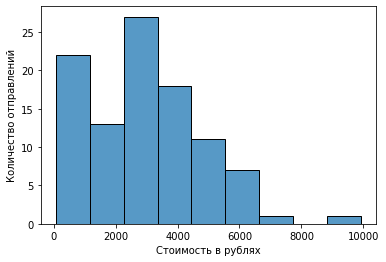

In [ ]:
#Гистограмма 
sns.histplot(parcel_aggr['price']/100)
plt.xlabel('Стоимость в рублях')
plt.ylabel('Количество отправлений')

In [ ]:
pd.cut(parcel_aggr['price']/100,5).value_counts().sort_index()

(66.805, 2043.584]      32
(2043.584, 4010.528]    44
(4010.528, 5977.472]    17
(5977.472, 7944.416]     6
(7944.416, 9911.36]      1
Name: price, dtype: int64

Text(0, 0.5, 'Количество отправлений')

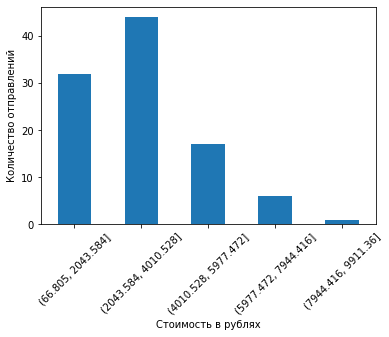

In [ ]:
pd.cut(parcel_aggr['price']/100,5).value_counts().sort_index().plot(kind='bar', rot=45)
plt.xlabel('Стоимость в рублях')
plt.ylabel('Количество отправлений')

In [ ]:
parcel_aggr['price'].describe()

count       100.000000
mean     291366.780000
std      186337.571623
min        7664.000000
25%      137465.750000
50%      273514.000000
75%      398163.250000
max      991136.000000
Name: price, dtype: float64

# Выполнение задания на python:

In [ ]:
parcel_aggr

,parcel_id,accept_date,index_id,mass,price,client_type
0,0,2017-04-13,9,4619,309642,Физическое лицо
1,1,2017-04-13,8,4488,396160,Юридическое лицо
2,2,2017-04-21,3,11865,148675,Физическое лицо
3,3,2017-04-22,2,9623,14271,Физическое лицо
4,4,2017-04-25,7,19054,68317,Физическое лицо
...,...,...,...,...,...,...
95,95,2017-04-13,2,18982,242519,Физическое лицо
96,96,2017-04-27,2,8586,403403,Юридическое лицо
97,97,2017-04-28,6,19529,212936,Физическое лицо
98,98,2017-04-27,5,4801,573355,Юридическое лицо


In [ ]:
index_data

,index_id,area,population
0,1,city_1,11
1,2,city_2,29
2,3,city_3,7
3,4,city_4,53
4,5,city_5,70
5,6,city_6,347
6,7,city_7,403
7,8,city_8,110
8,9,city_9,526
9,10,city_10,657


**1) Вывести средний размер тарифа на пересылку и массы по индексам отделений, в которых было принято отправление.**

In [ ]:
t = parcel_aggr.groupby('index_id',dropna=False)[['price','mass']].agg('mean')
t.columns = ['price_mean','mass_mean']
t.reset_index()

,index_id,price_mean,mass_mean
0,1,258953.500000,10965.250000
1,2,384006.666667,11517.833333
2,3,174957.400000,13224.400000
3,4,256390.000000,13484.000000
4,5,369511.928571,11073.285714
5,6,228847.125000,15909.500000
6,7,330567.200000,13758.900000
7,8,284545.555556,9496.888889
8,9,283630.583333,9063.750000
9,10,265592.714286,13054.428571


**2) Вывести количество отправлений в разрезе индексов отделений, в которых было принято отправление. Учитывать только те отправления, у которых масса  больше  или равна 10 кг.**

In [ ]:
t = parcel_aggr[parcel_aggr['mass'] >= 10000]
t = t.groupby('index_id', dropna=False)['parcel_id'].agg('count').reset_index()
t.columns = ['index_id', 'cnt_parcels']
t

,index_id,cnt_parcels
0,1,8
1,2,7
2,3,8
3,4,4
4,5,9
5,6,8
6,7,9
7,8,5
8,9,5
9,10,5


**3) Вывести  количество отправлений в разрезе  типа отправителя и группы по численности населения населенного пункта, в котором было принято отправление (меньше 50 тыс. (включительно), от 50 до 100 тыс. (включительно), от 100 до 500 тыс. (включительно), больше 500 тыс.).**

In [ ]:
def population_group(x):
  if x <= 50:
    return 'меньше 50 тыс. (включительно)'
  elif x > 50 and x <=100:
    return 'от 50 до 100 тыс. (включительно)'
  elif x > 100 and x <=500:
    return 'от 100 до 500 тыс. (включительно)'
  else:
    return 'больше 500 тыс.'

In [ ]:
index_data['population_groups'] = index_data['population'].apply(population_group)

In [ ]:
index_data

,index_id,area,population,population_groups
0,1,city_1,11,меньше 50 тыс. (включительно)
1,2,city_2,29,меньше 50 тыс. (включительно)
2,3,city_3,7,меньше 50 тыс. (включительно)
3,4,city_4,53,от 50 до 100 тыс. (включительно)
4,5,city_5,70,от 50 до 100 тыс. (включительно)
5,6,city_6,347,от 100 до 500 тыс. (включительно)
6,7,city_7,403,от 100 до 500 тыс. (включительно)
7,8,city_8,110,от 100 до 500 тыс. (включительно)
8,9,city_9,526,больше 500 тыс.
9,10,city_10,657,больше 500 тыс.


In [ ]:
t = parcel_aggr.merge(index_data, how='left', on='index_id')
t

,parcel_id,accept_date,index_id,mass,price,client_type,area,population,population_groups
0,0,2017-04-13,9,4619,309642,Физическое лицо,city_9,526,больше 500 тыс.
1,1,2017-04-13,8,4488,396160,Юридическое лицо,city_8,110,от 100 до 500 тыс. (включительно)
2,2,2017-04-21,3,11865,148675,Физическое лицо,city_3,7,меньше 50 тыс. (включительно)
3,3,2017-04-22,2,9623,14271,Физическое лицо,city_2,29,меньше 50 тыс. (включительно)
4,4,2017-04-25,7,19054,68317,Физическое лицо,city_7,403,от 100 до 500 тыс. (включительно)
...,...,...,...,...,...,...,...,...,...
95,95,2017-04-13,2,18982,242519,Физическое лицо,city_2,29,меньше 50 тыс. (включительно)
96,96,2017-04-27,2,8586,403403,Юридическое лицо,city_2,29,меньше 50 тыс. (включительно)
97,97,2017-04-28,6,19529,212936,Физическое лицо,city_6,347,от 100 до 500 тыс. (включительно)
98,98,2017-04-27,5,4801,573355,Юридическое лицо,city_5,70,от 50 до 100 тыс. (включительно)


In [ ]:
t = (t.groupby(['client_type','population_groups'],dropna=False)[['parcel_id']].
    agg('count'))
t

parcel_id
client_type      population_groups                           
Физическое лицо  больше 500 тыс.                           10
                 меньше 50 тыс. (включительно)             22
                 от 100 до 500 тыс. (включительно)         16
                 от 50 до 100 тыс. (включительно)           8
Юридическое лицо больше 500 тыс.                            9
                 меньше 50 тыс. (включительно)             12
                 от 100 до 500 тыс. (включительно)         11
                 от 50 до 100 тыс. (включительно)          12

In [ ]:
t.columns = ['cnt_parcels']
t.reset_index()

,client_type,population_groups,cnt_parcels
0,Физическое лицо,больше 500 тыс.,10
1,Физическое лицо,меньше 50 тыс. (включительно),22
2,Физическое лицо,от 100 до 500 тыс. (включительно),16
3,Физическое лицо,от 50 до 100 тыс. (включительно),8
4,Юридическое лицо,больше 500 тыс.,9
5,Юридическое лицо,меньше 50 тыс. (включительно),12
6,Юридическое лицо,от 100 до 500 тыс. (включительно),11
7,Юридическое лицо,от 50 до 100 тыс. (включительно),12


4) Вывести идентификатор отправления; регион, где было принято отправление; численность населения населенного пункта, в котором было принято отправление и стоимость пересылки отправления (в рублях) с максимальной массой в каждом филиале.

In [ ]:
t_max = parcel_aggr.groupby('index_id')['mass'].agg('max').reset_index()

In [ ]:
t_max

,index_id,mass
0,1,14947
1,2,19768
2,3,19257
3,4,18506
4,5,21992
5,6,21877
6,7,21768
7,8,17259
8,9,18677
9,10,23188


In [ ]:
t = parcel_aggr.merge(index_data, how='left', on='index_id')
t

,parcel_id,accept_date,index_id,mass,price,client_type,area,population,population_groups
0,0,2017-04-13,9,4619,309642,Физическое лицо,city_9,526,больше 500 тыс.
1,1,2017-04-13,8,4488,396160,Юридическое лицо,city_8,110,от 100 до 500 тыс. (включительно)
2,2,2017-04-21,3,11865,148675,Физическое лицо,city_3,7,меньше 50 тыс. (включительно)
3,3,2017-04-22,2,9623,14271,Физическое лицо,city_2,29,меньше 50 тыс. (включительно)
4,4,2017-04-25,7,19054,68317,Физическое лицо,city_7,403,от 100 до 500 тыс. (включительно)
...,...,...,...,...,...,...,...,...,...
95,95,2017-04-13,2,18982,242519,Физическое лицо,city_2,29,меньше 50 тыс. (включительно)
96,96,2017-04-27,2,8586,403403,Юридическое лицо,city_2,29,меньше 50 тыс. (включительно)
97,97,2017-04-28,6,19529,212936,Физическое лицо,city_6,347,от 100 до 500 тыс. (включительно)
98,98,2017-04-27,5,4801,573355,Юридическое лицо,city_5,70,от 50 до 100 тыс. (включительно)


In [ ]:
t = t.merge(t_max, how='inner', on=['index_id','mass'])[['parcel_id','area','population','price']]

In [ ]:
t['price'] = t['price']/100

In [ ]:
t

,parcel_id,area,population,price
0,12,city_2,29,3175.01
1,37,city_9,526,5667.87
2,42,city_1,11,76.64
3,46,city_7,403,1066.57
4,55,city_3,7,2328.61
5,59,city_5,70,3248.52
6,62,city_6,347,605.25
7,68,city_8,110,840.46
8,83,city_10,657,4615.75
9,88,city_4,53,845.64


5) Вывести идентификаторы отправлений, у которых  масса строго больше, чем в среднем по базе.

In [ ]:
t = parcel_aggr[parcel_aggr['mass'] > parcel_aggr['mass'].mean()][['parcel_id', 'mass']]

In [ ]:
t['avg_mass'] = parcel_aggr['mass'].mean()

In [ ]:
t

,parcel_id,mass,avg_mass
4,4,19054,11884.54
5,5,18719,11884.54
6,6,14542,11884.54
11,11,16222,11884.54
12,12,19768,11884.54
13,13,13781,11884.54
15,15,15875,11884.54
16,16,16493,11884.54
18,18,13893,11884.54
19,19,13691,11884.54


 6) Перед отпуском руководитель попросил вас: «вывести распределение количества отправлений по стоимости пересылки*». Необходимо подготовить 1 слайд, который раскроет данную проблематику.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Количество отправлений')

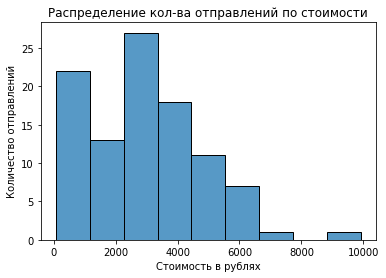

In [ ]:
#Гистограмма 
sns.histplot(parcel_aggr['price']/100)
plt.title('Распределение кол-ва отправлений по стоимости')
plt.xlabel('Стоимость в рублях')
plt.ylabel('Количество отправлений')

In [ ]:
pd.cut(parcel_aggr['price']/100,5).value_counts().sort_index()

(66.805, 2043.584]      32
(2043.584, 4010.528]    44
(4010.528, 5977.472]    17
(5977.472, 7944.416]     6
(7944.416, 9911.36]      1
Name: price, dtype: int64

Text(0, 0.5, 'Количество отправлений')

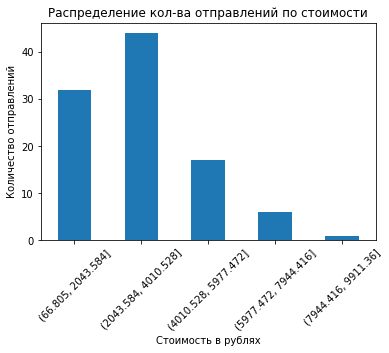

In [ ]:
pd.cut(parcel_aggr['price']/100,5).value_counts().sort_index().plot(kind='bar', rot=45)
plt.title('Распределение кол-ва отправлений по стоимости')
plt.xlabel('Стоимость в рублях')
plt.ylabel('Количество отправлений')

In [ ]:
parcel_aggr['price'].describe()

count       100.000000
mean     291366.780000
std      186337.571623
min        7664.000000
25%      137465.750000
50%      273514.000000
75%      398163.250000
max      991136.000000
Name: price, dtype: float64